# 1. 分子类 Molecule

## 1.1 概述
分子类 Molecule 定义在 /modules/molecule.py 文件中，负责分子对象的创建以及转换.

## 1.2 建立分子
### 1.2.1 建立分子

In [1]:
# 1.2.1 建立分子
# 这里使用图描述分子，分子的关键信息有原子（图的节点）和化学键（图的边），其中原子和化学键各有不同的种类.
# 创建第一个分子：水分子 H2O
from modules.molecule import Molecule
H2O_atoms = {'O':['2a'],
             'H':['1a','3a']}    # 各原子及其位置信息，详细说明见1.2.2
H2O = Molecule(
    name='H2O',
    name_Chinese='水',
    bone_atoms_dict = H2O_atoms)

### 1.2.2 打印分子信息
**原子位置**  
Molecule 类使用原子位置唯一标识每个原子，其格式为```<原子在主链上的位置><原子所在主链编号><该处原子的个数（可选）>```

以 1.2.1 节中的水分子为例，这里认为分子只有一条主链，即"H-O-H"链，记为链 ```a``` ;其中氧原子为第二个原子，故其位置编号为```'2a'```;依此类推，两个氢原子的编号分别为```'1a','3a'```

在声明对象时原子加入的顺序（比如1.2.1节中先加入氧原子后加入氢原子）只会影响调用 ```print_atoms()``` 等函数的输出结果顺序，并不影响后续任务

原子信息：
('2a', {'atom': 'O', 'atom_label': 3, 'leaf_atom_num': 0})
('1a', {'atom': 'H', 'atom_label': 2, 'leaf_atom_num': 0})
('3a', {'atom': 'H', 'atom_label': 2, 'leaf_atom_num': 0})
化学键信息：
(2a) O - H (1a)
(2a) O - H (3a)


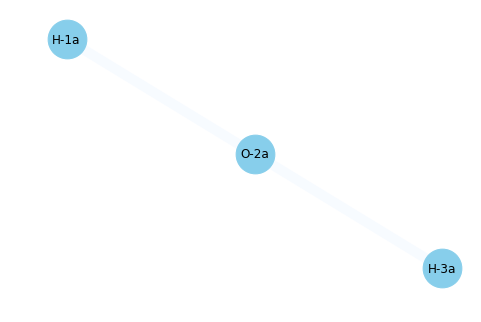

In [2]:
# 使用 print_atoms() 输出全部原子信息，
# 输出格式为：(location, {'atom':<atom>, 'atom_label': <atom_label>, 'side_atom_num':<side_atom_num>})
print('原子信息：');      
H2O.print_atoms()

# 使用print_bonds() 输出全部化学键信息
# 输出格式为：(<原子1位置>) <原子1> <化学键类型> <原子2> (<原子2位置>)
print('化学键信息：');    H2O.print_bonds()

# 可视化输出
H2O.visualize()

### 1.2.3 主链与叶子原子、原子的其他信息
**多主链**  
有时分子中具有多条链，例如异丙醇（简洁起见这里略去所有氢原子）：
    
    C - C - C
        |
        O
        
异丙醇分子中有两条链：```C-C-C```和```C-C-O```，记前者为```a```链，后者为```b```链，则所有分子位置编号为：

            (2a)
    (1a)C - C - C(3a)
            |
            O
            (3b)

**主链与叶子原子**  
考虑仲丁醇分子：  

    CH3-CH2-CH-CH3  
            |  
            OH  
            
对于这样较为复杂的分子，如果直接按上面节的方法为每个原子分配位置，则会导致主链过多：例如，最左侧甲基(```CH3```)的四个原子需要被分配到```'1a','1b','1c','2a'```：

        H(3b)   H(4d)   H(5f)   H (6h)
    (1a)|       |       |       |
    H - C(2a) - C(3a) - C(4a) - C (5a) - H(6a) 
        |       |       |       |
        H(1c)   H(4e)   O(5g)   H (6i)
                        |
                        H(6g)

我们可以将分子最外侧的原子看作“叶子原子”（类似树结构中的叶节点），用与其相连的主链原子为其指定位置。例如在仲丁醇中，所有氢原子都是叶子节点，那么可以这样指定原子位置：

          H(1a++)    H(2a+)  H(3a+)  H (4a+)
    (1a+) |          |       |       |
    H  -  C(1a)   -  C(2a) - C(3a) - C (4a) - H(4a+++) 
          |          |       |       |
          H(1a+++)   H(2a++) O(4b)   H (4a++)
                             |
                             H(4b+)
                             
在初始化 Molecule 对象是，通过```bone_atoms_list```指定主链原子，通过```lead_atoms_list```指定叶子原子. 每个叶子原子具有```leaf_atom_num```属性来表明有多少个叶子原子与其相连

('1a', {'atom': 'O', 'atom_label': 3, 'leaf_atom_num': 2})
('1a+', {'atom': 'H', 'atom_label': 2})
('1a++', {'atom': 'H', 'atom_label': 2})
(1a) O - H (1a+)
(1a) O - H (1a++)


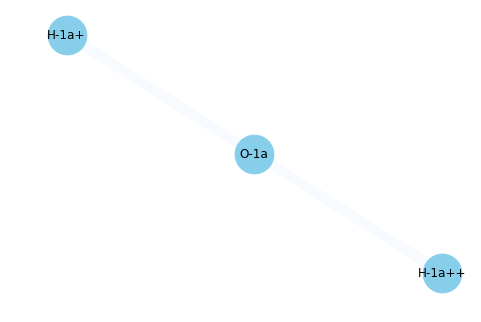

In [3]:
# 用 leaf_atoms_dict 重新声明水分子对象
H2O = Molecule(
    name='H2O',
    name_Chinese='水',
    bone_atoms_dict={'O':['1a']},
    leaf_atoms_dict={'H':['1a2']})
# 输出分子信息
H2O.print_atoms()
H2O.print_bonds()
H2O.visualize()

**原子的其他信息**
在上边的输出结果中，我们可以看到原子还有```atom_label```属性，这是由于有些算法只支持```int```型的原子类型表示，而不支持字符串，因此在建立分子时自动将原子（例如'H'）转换成唯一对应的```label```（例如2）. 默认的转换方式为：  
```{'C': 1, 'H': 2, 'O': 3, 'S': 4, 'N': 5, 'Cl': 6, 'Ph': 7}```（```'Ph'```代表苯环）

如有需要，也可以显式指定 ```atom_type_to_label_dict``` 属性使用自定义转换对应方式

('1a', {'atom': 'O', 'atom_label': 3, 'leaf_atom_num': 2})
('1a+', {'atom': 'H', 'atom_label': 256})
('1a++', {'atom': 'H', 'atom_label': 256})
(1a) O - H (1a+)
(1a) O - H (1a++)


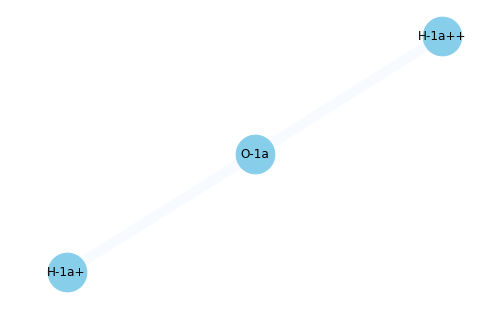

In [4]:
# 用 atom_type_to_label_dict 重新声明水分子对象
H2O = Molecule(
    name='H2O',
    name_Chinese='水',
    bone_atoms_dict={'O':['1a']},
    leaf_atoms_dict={'H':['1a2']},
    atom_type_to_label_dict={'C': 1, 'H': 256, 'O': 3, 'S': 4, 'N': 5, 'Cl': 6, 'Ph': 7})
# 输出分子信息
H2O.print_atoms()
H2O.print_bonds()
H2O.visualize()

### 1.2.4 化学键类型
与原子相似，分子中的化学键也存在不同类型. 目前 Molecule 支持单键(```single```)、双键(```double```)、PI键(```pi```)三种类型. 

在建立分子时，Molecule 的构造函数(```__init__()```)会自动将位置编号相邻的原子以单键相连；若需要添加其他位置或者类型的化学键，可以通过```additional_or_special_bonds_list```添加

分子：丙酮
原子信息：
('1a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 3})
('2a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 0})
('3a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 3})
('3b', {'atom': 'O', 'atom_label': 3, 'leaf_atom_num': 0})
('1a+', {'atom': 'H', 'atom_label': 2})
('1a++', {'atom': 'H', 'atom_label': 2})
('1a+++', {'atom': 'H', 'atom_label': 2})
('3a+', {'atom': 'H', 'atom_label': 2})
('3a++', {'atom': 'H', 'atom_label': 2})
('3a+++', {'atom': 'H', 'atom_label': 2})
化学键信息：
(1a) C - C (2a)
(1a) C - H (1a+)
(1a) C - H (1a++)
(1a) C - H (1a+++)
(2a) C - C (3a)
(2a) C = O (3b)
(3a) C - H (3a+)
(3a) C - H (3a++)
(3a) C - H (3a+++)


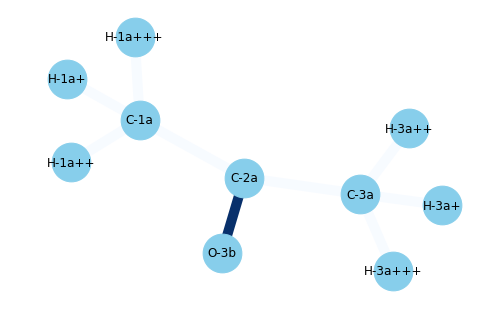

In [5]:
# 分子中存在双键
"""
丙酮 Propanone
    CH3-C-CH3
        ||
        O
"""
propanone = Molecule(
        name = 'Propanone',
        name_Chinese='丙酮',
        bone_atoms_dict={'C':['1a','2a','3a'],
                         'O':['3b']},
        leaf_atoms_dict={'H':['1a3','3a3']},
        additional_or_special_bonds_list=[['2a','3b','double']])

print('分子：{}'.format(propanone.name_Chinese))
print('原子信息：');      propanone.print_atoms()
print('化学键信息：');    propanone.print_bonds()
propanone.visualize()

分子：四氢呋喃
原子信息：
('1a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('2a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('3a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('4a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('5a', {'atom': 'O', 'atom_label': 3, 'leaf_atom_num': 0})
('1a+', {'atom': 'H', 'atom_label': 2})
('1a++', {'atom': 'H', 'atom_label': 2})
('2a+', {'atom': 'H', 'atom_label': 2})
('2a++', {'atom': 'H', 'atom_label': 2})
('3a+', {'atom': 'H', 'atom_label': 2})
('3a++', {'atom': 'H', 'atom_label': 2})
('4a+', {'atom': 'H', 'atom_label': 2})
('4a++', {'atom': 'H', 'atom_label': 2})
化学键信息：
(1a) C - C (2a)
(1a) C - H (1a+)
(1a) C - H (1a++)
(1a) C - O (5a)
(2a) C - C (3a)
(2a) C - H (2a+)
(2a) C - H (2a++)
(3a) C - C (4a)
(3a) C - H (3a+)
(3a) C - H (3a++)
(4a) C - O (5a)
(4a) C - H (4a+)
(4a) C - H (4a++)


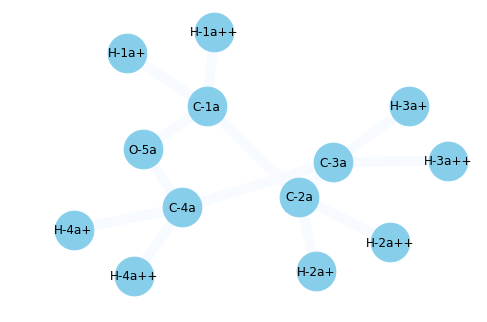

In [6]:
# 分子中存在环
'''
2. 四氢呋喃 oxolane
    1a  2a  3a  4a
    C - C - C - C
    |           |
    ------O------
          5a
若不在 additional_or_special_bonds_list 中添加键，则1a和5a不会相连
'''
oxolane = Molecule(
        name = 'Oxolane',
        name_Chinese='四氢呋喃',
        bone_atoms_dict={'C':['1a','2a','3a','4a'],
                     'O':['5a']},
        leaf_atoms_dict={'H':['1a2','2a2','3a2','4a2']},
        additional_or_special_bonds_list=[['5a','1a']])
print('分子：{}'.format(oxolane.name_Chinese))
print('原子信息：');      oxolane.print_atoms()
print('化学键信息：');    oxolane.print_bonds()
oxolane.visualize()

## 1.3 Molecule 类的其他方法
### 1.3.1 ```ignoreH()```
很多时候分子中的氢原子对分子性质影响甚微，但会造成分子结构的明显改变. 因此，为了消除氢原子的干扰，可以使用```ignoreH()```方法去除分子中的所有氢原子以及与与这些氢原子相连的化学键. 注意```ignoreH()```方法会返回去除氢原子的分子，但不会改变调用该方法的分子

分子：四氢呋喃
原子信息：
('1a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('2a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('3a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('4a', {'atom': 'C', 'atom_label': 1, 'leaf_atom_num': 2})
('5a', {'atom': 'O', 'atom_label': 3, 'leaf_atom_num': 0})
化学键信息：
(1a) C - C (2a)
(1a) C - O (5a)
(2a) C - C (3a)
(3a) C - C (4a)
(4a) C - O (5a)


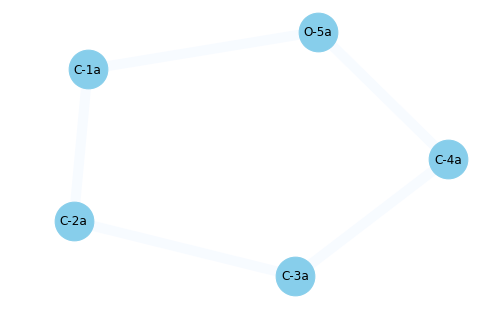

In [7]:
oxolane_ignoreH = oxolane.ignoreH()
print('分子：{}'.format(oxolane_ignoreH.name_Chinese))
print('原子信息：');      oxolane_ignoreH.print_atoms()
print('化学键信息：');    oxolane_ignoreH.print_bonds()
oxolane_ignoreH.visualize()

### 1.3.2 ```expandPh()```
```expandPh```方法可以将分子中的苯环(```'Ph'```)替换为由PI键相连的碳六元环

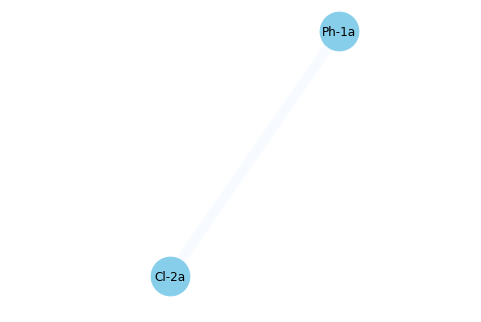

In [8]:
'''
氯苯 PhCl
    ⌬-Cl
'''
PhCl = Molecule(
        name = 'PhCl',
        name_Chinese='氯苯',
        bone_atoms_dict={'Ph':['1a'], 'Cl': ['2a']})
PhCl.visualize()

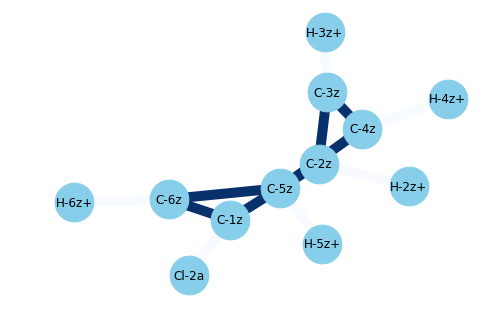

In [9]:
PhCl_expand = PhCl.expandPh()
PhCl_expand.visualize()

### 1.3.3 ```to_GraKel_graph()```

In [10]:
edges, atoms_labels, bond_labels_dict = PhCl.to_GraKel_graph()
print('labels: \n'+str(edges))
print('atoms_labels:\n'+str(atoms_labels))
print('bond_labels_dict:\n'+str(bond_labels_dict))

labels: 
  (0, 1)	1
  (1, 0)	1
atoms_labels:
{0: 'Ph', 1: 'Cl'}
bond_labels_dict:
{0: 1}


# 2. 性能预测器类 KernelSVR


## 2.1 读取数据

In [11]:
import numpy as np
from modules.molecule_dataset import molecule_structures, molecule_performance # 全部分子数据
from modules.utils import train_test_split
# 将全部数据的 80% 作为训练集，剩余 20% 作为测试集
train_ratio = 0.8
m_train, y_train, m_test, y_test = train_test_split(molecule_structures, molecule_performance, train_ratio)

## 2.2 预测

In [12]:
from modules.utils import toGraKelList, print_name_pred_real_dif
from modules.kernelSVR import KernelSVR
ignoreH = False
expandPh = True

# 建立预测器并训练
ks = KernelSVR()
ks.fit(toGraKelList(m_train, ignoreH, expandPh), y_train)

# 预测
ks_pred_train = ks.predict(toGraKelList(m_train, ignoreH, expandPh))
ks_pred_test = ks.predict(toGraKelList(m_test, ignoreH, expandPh))

# 输出结果
print_name_pred_real_dif([m.name_Chinese for m in m_train], ks_pred_train, y_train)
print_name_pred_real_dif([m.name_Chinese for m in m_test], ks_pred_test, y_test)

Computing kernels...
kernel: subtree_wl
kernel: random_walk
kernel: shortest_path
kernel: odd_sth
kernel: propagation
kernel: pyramid_match
kernel: propagation
kernel: vertex_histogram
kernel: edge_histogram
Fitting SVRs...
Computing kernels...
SVRs Predicting...
Computing kernels...
SVRs Predicting...
名称		预测值		真实值	差
糠醛		97.8950		98	-0.1050
苯胺		7.0999		7	0.0999
苯甲醇		30.0997		30	0.0997
苯甲醛		97.8908		98	-0.1092
1,4-二氧六环	2.1000		2	0.1000
二甲基亚砜		39.8989		40	-0.1011
丙酮		5.1000		5	0.1000
噻吩		4.1007		4	0.1007
N,N-二甲基甲酰胺	5.0997		5	0.0997
2-噻吩甲醛		94.8953		95	-0.1047
苯甲酸		92.0970		92	0.0970
乙酸乙酯		5.1003		5	0.1003
仲丁醇		1.9006		2	-0.0994
氯苯		5.9001		6	-0.0999
甲醇		4.9007		5	-0.0993
二苯甲酮		4.1115		4	0.1115
名称		预测值		真实值	差
四氢呋喃		33.8221		4	29.8221
环己酮		93.6144		95	-1.3856
甲苯		-25.5538		4	-29.5538
氯化苄		10.7527		96	-85.2473
